In [2]:
from matplotlib import pyplot as plt

In [3]:
import random
def restart(num):
    """
    The restart function establishes a starting state for the n-queens problem, where the n is the given num
    """
    state = [0]*num
    for i in range(num):
        r = random.randrange(num)
        state[i] = r
    return state

In [4]:
import math
def isAttacking(s, q1, q2):
    """
    The isAttacking function takes in a state and two queens, and checks to see 
    if the queens are attacking one another
    """
    hdelta = math.fabs(s[q1]-s[q2])
    if hdelta == 0: #same column
        return True
    
    vdelta = math.fabs(q1-q2) #on diagonal
    if hdelta == vdelta:
        return True
    return False

In [5]:
def objf(state):
    """
    The objf function takes in a state, and returns the number of queens that are not attacking one another
    """
    sum_ = 0
    for q1 in range(len(state)):
        for q2 in range(len(state)):
            if q1==q2:
                continue
            if not isAttacking(state, q1, q2):
                sum_+=1
    return sum_

In [6]:
def display(board):
    """
    The display function displays a state in the n queens problem
    """
    for row in range(len(board)):
        rowStr = str(board[row])
        for col in range(len(board)):
            if board[row] == col:
                rowStr += " Q"
            else:
                rowStr += " _"
        print(rowStr)
    print("\n"+str(objf(board))+"\n")

In [7]:
def nextStates(state):
    """
    The nextStates function takes in a state and returns the possible states if a queen on the board is moved
    """
    lst = []
    for r in range(len(state)):
        skpi = state[r]
        other = list(range(len(state)))
        other.remove(skpi)
        for o in other:
            nstate = list(state)
            nstate[r] = o
            lst.append(nstate)
    return lst


In [8]:
def kBeamSearch(k, num):
    """
    The kBeamSearch function takes in a k value and a number of queens to evaluate. It then runs a local beam search with
    k different values searched for each iteration. It generates k states and checks to see if any of them are a goal state. If 
    no states are goal states, it then generates all successors of our k states, and chooses the k best states. While doing this,
    it keeps track of the best state. If none of the k best states are better than our best state, then it returns the best 
    state.
    """
    goal = num*(num-1)
    #First, we randomly generate k initial states
    states = []
    best = [1,1,1,1,1,1,1,1] 
    for i in range(k):
        state = restart(num)
        if(objf(state) == goal):
            #If one of our random states is a goal state, we return that state
            return state
        states.append(state)
        if (objf(state) > objf(best)):
            best = state #we keep track of the best state we start with
    
    for x in range(100):
        #We then generate all successors of our k states
        nextGen = []
        for i in range(k):
            nextGen += nextStates(states[i])
        #We then find the k best states of our successors
        
        worseThanBest = 0 #technically, worse than or equal to, but this is shorter
        for i in range(k):
            m = list(map(objf, nextGen))
            next = nextGen[m.index(max(m))]
            nextGen.remove(next)
            if objf(next) <= objf(best): 
                #we continue to track our best state, and if no state is better than the best state, the best state is returned
                worseThanBest+=1
            else:
                best = next
            states[i] = next
            if worseThanBest == k:
                return best
            
            
    return best

In [ ]:
goal = 8*(8-1)
allResults = [] #List of all result lists
allAvgObjf = [] #list of each average objf result
allGoals = [] #List of each 'number of goals' found
for k in range(100):
    print("---------------------------------------------------"+str(k)+"----------------------------------------------------")
    results = [] #all fifty results found for this k value
    goals = 0
    for count in range(10):
        results.append(objf(kBeamSearch(k+1, 8)))
        if results[count] == goal:
            goals += 1
    allResults.append(results)
    averageObjf = sum(results)/len(results)
    allAvgObjf.append(averageObjf)
    allGoals.append(goals)
    
    
print("AllResults: "+str(allResults))
print("AllAverageObjf: "+str(allAvgObjf))
print("AllGoals: "+str(allGoals))

plt.figure(1)
plt.subplot(131)
plt.plot(range(100), allAvgObjf)
plt.xlabel("Value of k")
plt.ylabel("Average Final Objf Value")

plt.figure(2)
plt.subplot(132)
plt.plot(range(100), allGoals)
plt.xlabel("Value of k")
plt.ylabel("Average times final state was goal state")
plt.show()

print("Number of times goal was found: "+str(sum(allGoals)))
print("Percentage goal was found: "+str(10*len(allGoals)/1000))
print("Mean of objf results: "+str(sum(allAvgObjf)/len(allAvgObjf)))

---------------------------------------------------0----------------------------------------------------
---------------------------------------------------1----------------------------------------------------
---------------------------------------------------2----------------------------------------------------
---------------------------------------------------3----------------------------------------------------
---------------------------------------------------4----------------------------------------------------
---------------------------------------------------5----------------------------------------------------
---------------------------------------------------6----------------------------------------------------
---------------------------------------------------7----------------------------------------------------
---------------------------------------------------8----------------------------------------------------
---------------------------------------------------9---

AllResults: [[52, 54, 56, 54, 54, 52, 54, 54, 52, 56], [54, 54, 54, 56, 54, 52, 54, 54, 54, 54], [54, 56, 54, 54, 52, 54, 54, 54, 54, 54], [54, 54, 54, 54, 54, 56, 56, 54, 54, 56], [56, 52, 54, 52, 54, 56, 54, 56, 54, 54], [54, 56, 54, 54, 56, 56, 52, 52, 56, 56], [56, 56, 54, 54, 52, 54, 54, 52, 56, 54], [54, 52, 52, 54, 54, 56, 56, 56, 54, 56], [54, 54, 56, 56, 56, 54, 56, 56, 54, 54], [56, 54, 52, 56, 54, 56, 56, 56, 56, 54], [56, 52, 54, 56, 54, 54, 52, 54, 54, 56], [54, 56, 56, 54, 56, 56, 54, 54, 56, 54], [56, 54, 54, 54, 56, 56, 54, 54, 56, 54], [56, 56, 54, 54, 56, 54, 56, 54, 56, 56], [54, 54, 56, 52, 56, 56, 56, 56, 56, 56], [54, 54, 56, 54, 54, 54, 54, 56, 56, 56], [56, 54, 56, 56, 52, 54, 56, 56, 56, 56], [56, 56, 54, 54, 54, 56, 56, 56, 56, 56], [54, 56, 54, 56, 54, 54, 56, 56, 56, 54], [56, 54, 56, 56, 56, 54, 56, 56, 56, 56], [50, 52, 56, 56, 56, 56, 56, 54, 56, 56], [56, 56, 54, 54, 56, 54, 56, 54, 54, 56], [56, 56, 54, 56, 54, 56, 56, 56, 56, 56], [54, 54, 54, 54, 54, 

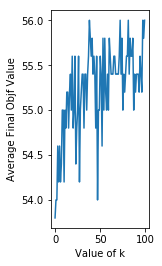

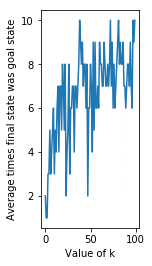

Number of times goal was found: 666
Percentage goal was found: 1.0
Mean of objf results: 55.236000000000004


In [14]:
print("AllResults: "+str(allResults))
print("AllAverageObjf: "+str(allAvgObjf))
print("AllGoals: "+str(allGoals))

plt.figure(1)
plt.subplot(131)
plt.plot(range(100), allAvgObjf)
plt.xlabel("Value of k")
plt.ylabel("Average Final Objf Value")

plt.figure(2)
plt.subplot(132)
plt.plot(range(100), allGoals)
plt.xlabel("Value of k")
plt.ylabel("Average times final state was goal state")
plt.show()

print("Number of times goal was found: "+str(sum(allGoals)))
print("Percentage goal was found: "+str(10*len(allGoals)/1000))
print("Mean of objf results: "+str(sum(allAvgObjf)/len(allAvgObjf)))